## CNN Classification - Cats & Dogs dataset

In [1]:
import numpy as np
import tensorflow as tf 

In [2]:
np.__version__, tf.__version__

('1.26.4', '2.17.0')

In [3]:
import tempfile
import zipfile

temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory 'C:\\Users\\Matheus\\AppData\\Local\\Temp\\tmpzqpwv0_4'>


In [4]:
temp_dir.name

'C:\\Users\\Matheus\\AppData\\Local\\Temp\\tmpzqpwv0_4'

In [5]:
with zipfile.ZipFile('../data/cats_and_dogs/dataset.zip', 'r') as zip:
    zip.extractall(temp_dir.name)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
model = Sequential()
model.add(InputLayer(shape = (64, 64, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='sigmoid')) # binary classification: a cat or a dog

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
generator_train = ImageDataGenerator(rescale=1./255, 
                                     horizontal_flip=True,
                                     shear_range=0.2,
                                     height_shift_range=0.07,
                                     zoom_range=0.2)

In [11]:
generator_test = ImageDataGenerator(rescale=1./255)

In [12]:
data_train = generator_train.flow_from_directory(f'{temp_dir.name}/dataset/training_set', 
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 4000 images belonging to 2 classes.


In [13]:
f'{temp_dir.name}/dataset/training_set'

'C:\\Users\\Matheus\\AppData\\Local\\Temp\\tmpzqpwv0_4/dataset/training_set'

In [14]:
data_test = generator_test.flow_from_directory(f'{temp_dir.name}/dataset/test_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [15]:
model.fit(data_train, epochs=10, validation_data=data_test)

Epoch 1/10


c:\Users\Matheus\Documents\GitHub\ai-experiments\ai-exp\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 223ms/step - accuracy: 0.5658 - loss: 0.8978 - val_accuracy: 0.5010 - val_loss: 0.8237
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.6158 - loss: 0.6780 - val_accuracy: 0.5370 - val_loss: 0.8790
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.6704 - loss: 0.6259 - val_accuracy: 0.6180 - val_loss: 0.7478
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7019 - loss: 0.5744 - val_accuracy: 0.6670 - val_loss: 0.5925
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.7026 - loss: 0.5612 - val_accuracy: 0.6960 - val_loss: 0.5783
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7389 - loss: 0.5259 - val_accuracy: 0.6800 - val_loss: 0.5920
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7317 - loss: 0.5209 - val_accuracy: 0.6150 - val_loss: 0.7535
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7420 - loss: 0.5245 - val_accura

In [16]:
# how does it take 125 each epoch 
#(data_train)/(batch_size)  = 125
4000 / 32

125.0

In [49]:
# predict from only one image 

test_img = image.load_img(f'{temp_dir.name}/dataset/test_set/gato/cat.3501.jpg', target_size=(64, 64))


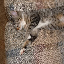

In [50]:
test_img

In [51]:
type(test_img)

PIL.Image.Image

In [52]:
test_img = image.img_to_array(test_img)
test_img

array([[[ 77.,  52.,  30.],
        [ 73.,  48.,  26.],
        [ 78.,  51.,  32.],
        ...,
        [148., 130., 118.],
        [130., 114., 101.],
        [139., 123., 110.]],

       [[ 82.,  57.,  35.],
        [ 84.,  59.,  37.],
        [ 86.,  59.,  40.],
        ...,
        [138., 122., 109.],
        [132., 118., 105.],
        [129., 115., 102.]],

       [[ 86.,  61.,  39.],
        [ 73.,  48.,  26.],
        [ 75.,  48.,  29.],
        ...,
        [132., 120., 106.],
        [153., 144., 129.],
        [112., 103.,  88.]],

       ...,

       [[ 83.,  57.,  34.],
        [ 83.,  57.,  34.],
        [ 88.,  64.,  40.],
        ...,
        [147., 129., 117.],
        [ 99.,  94.,  90.],
        [124., 117., 111.]],

       [[ 78.,  52.,  29.],
        [ 91.,  65.,  42.],
        [ 87.,  63.,  39.],
        ...,
        [121., 103.,  91.],
        [111.,  97.,  86.],
        [127., 125., 126.]],

       [[ 95.,  69.,  46.],
        [ 76.,  50.,  27.],
        [ 94.,  

In [53]:
test_img /= 255
test_img, test_img.shape

(array([[[0.3019608 , 0.20392157, 0.11764706],
         [0.28627452, 0.1882353 , 0.10196079],
         [0.30588236, 0.2       , 0.1254902 ],
         ...,
         [0.5803922 , 0.50980395, 0.4627451 ],
         [0.50980395, 0.44705883, 0.39607844],
         [0.54509807, 0.48235294, 0.43137255]],
 
        [[0.32156864, 0.22352941, 0.13725491],
         [0.32941177, 0.23137255, 0.14509805],
         [0.3372549 , 0.23137255, 0.15686275],
         ...,
         [0.5411765 , 0.47843137, 0.42745098],
         [0.5176471 , 0.4627451 , 0.4117647 ],
         [0.5058824 , 0.4509804 , 0.4       ]],
 
        [[0.3372549 , 0.23921569, 0.15294118],
         [0.28627452, 0.1882353 , 0.10196079],
         [0.29411766, 0.1882353 , 0.11372549],
         ...,
         [0.5176471 , 0.47058824, 0.41568628],
         [0.6       , 0.5647059 , 0.5058824 ],
         [0.4392157 , 0.40392157, 0.34509805]],
 
        ...,
 
        [[0.3254902 , 0.22352941, 0.13333334],
         [0.3254902 , 0.22352941, 0.13333

In [54]:
# to batch format 

test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 64, 64, 3)

In [55]:
predict = model.predict(test_img)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.5819597]], dtype=float32)

In [56]:
predict = predict > 0.5
predict

array([[ True]])

In [57]:
data_train.class_indices

{'cachorro': 0, 'gato': 1}